# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary

## Getting the Data
Here we start by importing a Python package called `requests`. We'll use it to pull the transcript of Macbeth from the [Project Gutenberg](https://www.gutenberg.org/) website. We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 120,253 characters - the first 500 of which are printed below. 

In [10]:
#Library to send GET requests to websites
import requests

#assign text to variable
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print('''This is the datatype of the variable, macbeth: {} \n
This is how many characters including spaces are in the play: {} \n
This is what the first 500 lines are: {}
'''.format(type(macbeth), len(macbeth), macbeth[:500]))

This is the datatype of the variable, macbeth: <class 'str'> 

This is how many characters including spaces are in the play: 120253 

This is what the first 500 lines are: ﻿

***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************



*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE
IS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK
(#1533) at https://www.gutenberg.org/ebooks/1533
*********************************



## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common Python programming pattern to count objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `.get()` dictionary method is very useful in doing this. Read the docstring for the `.get()` method and use it along with the pseudocode below to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into the variable 'macbeth'. Be sure to include a title and appropriate labels for your graph.

To get the 25 *most common* words, you will have to sort your counts. If you are not super sure how to do this, checkout out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

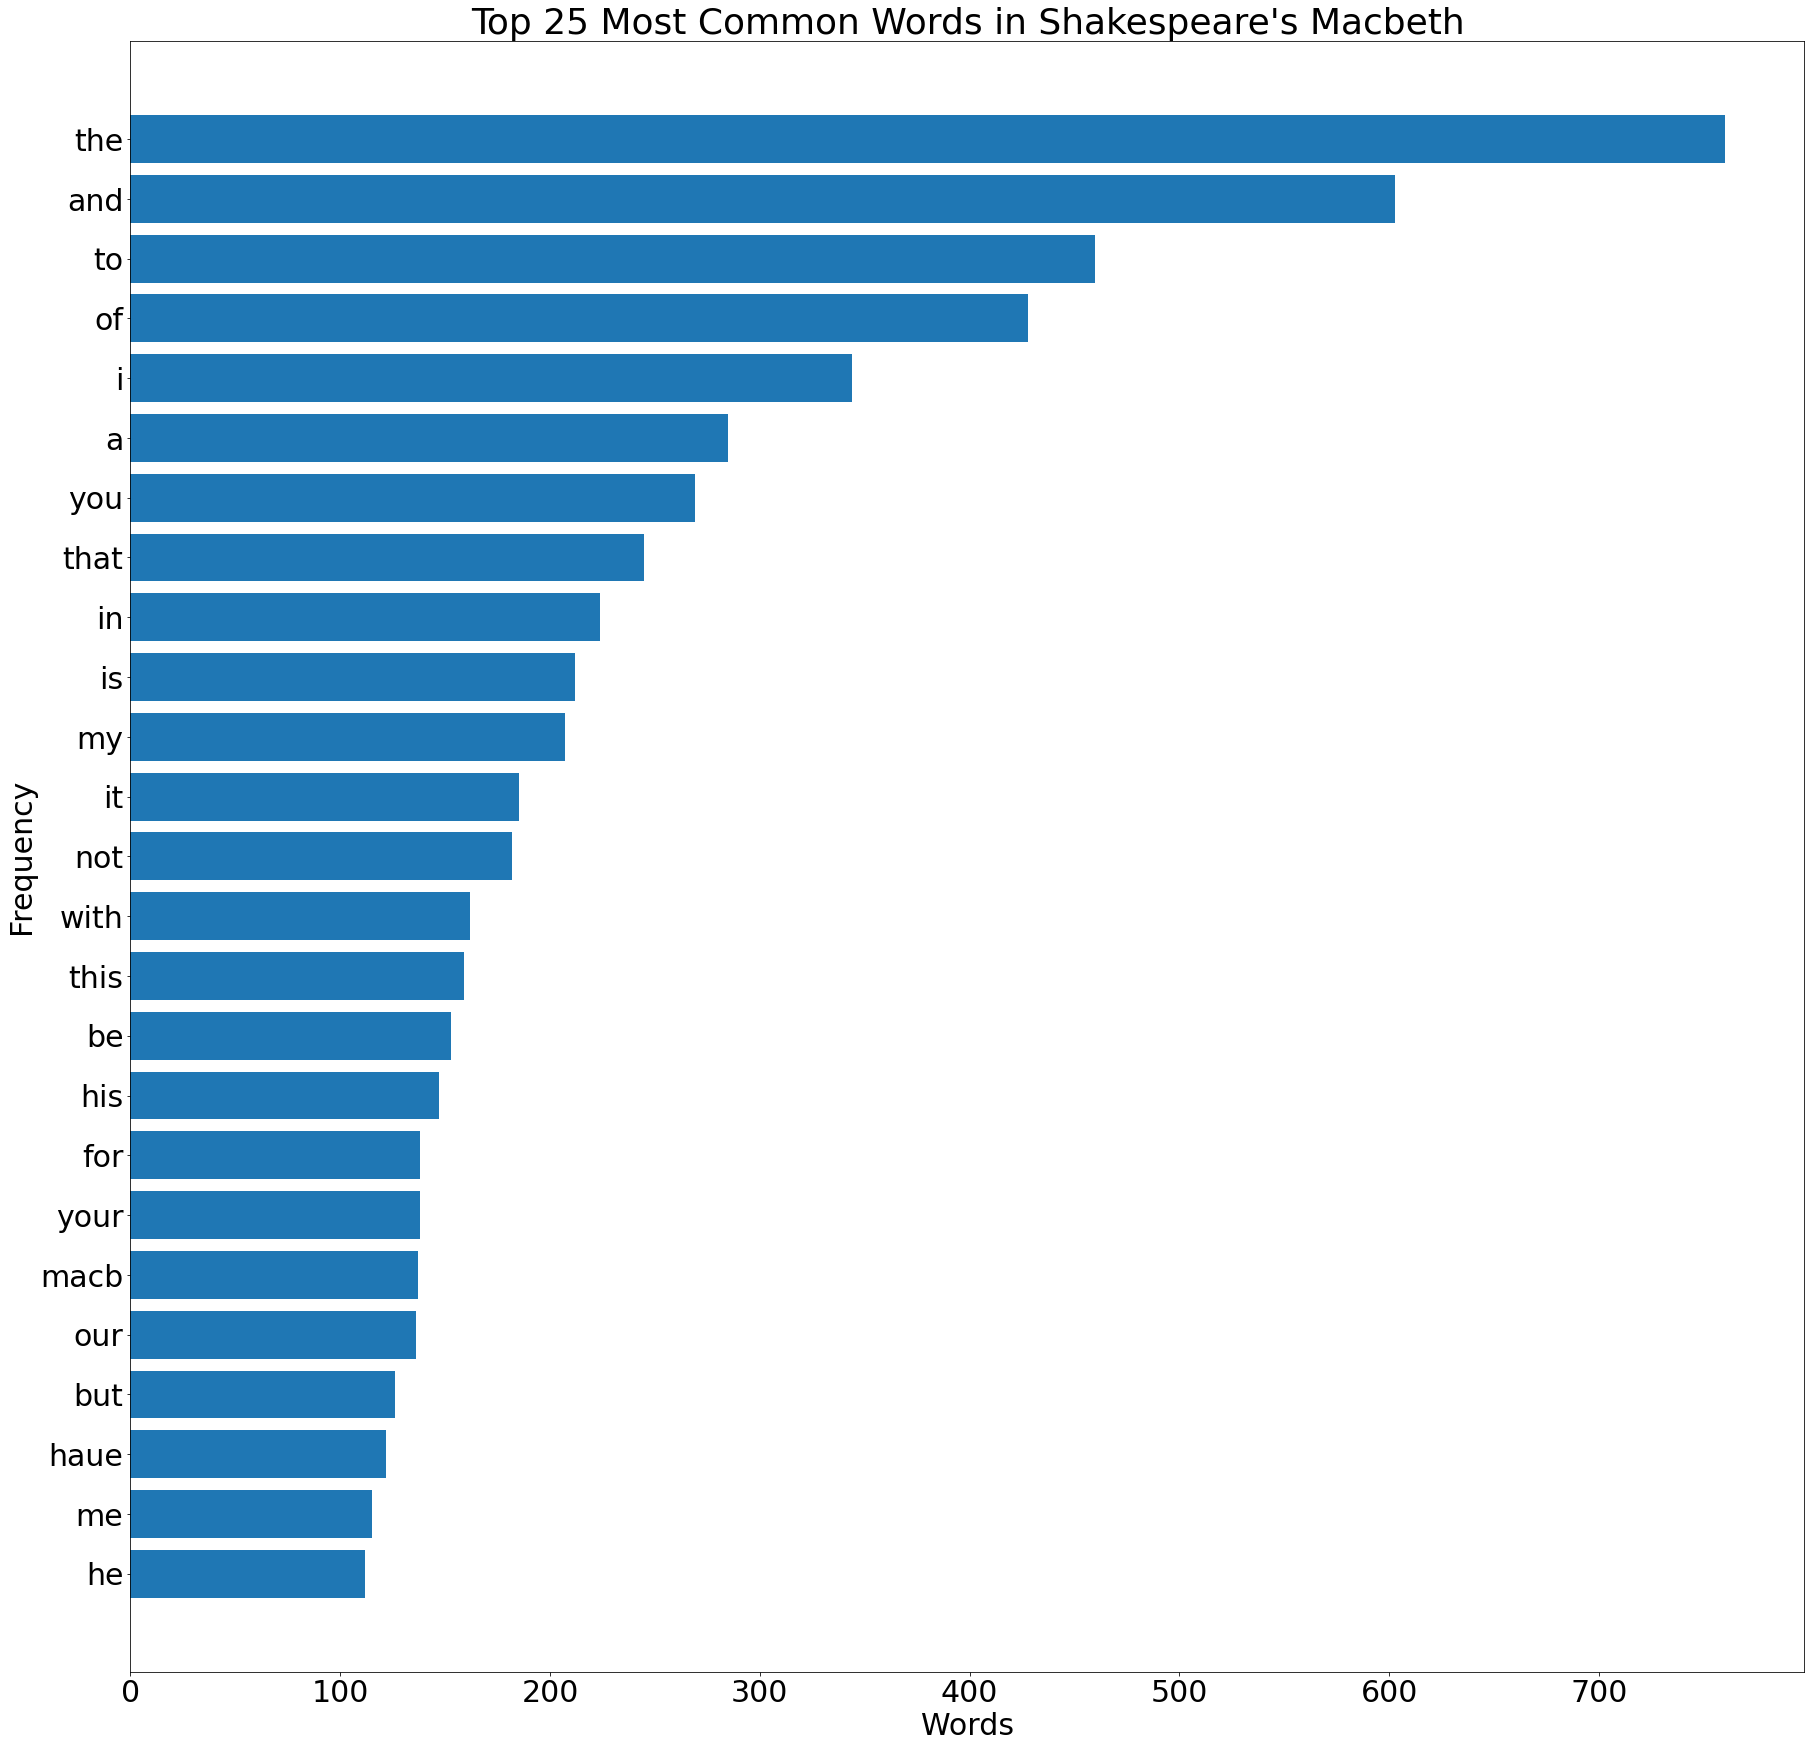

In [84]:
import matplotlib.pyplot as plt
import requests
import re 
import string

%matplotlib inline
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

#Splitting words from string while removing ALL punctation inculding possession punctation
string_to_words = re.sub('['+string.punctuation+']', '', macbeth).split()

#Lower casing all words
lowered_words=[]
for string_to_word in string_to_words:
    lowered_words.append(string_to_word.lower())

#Getting a list of unique words
unique_words = set(lowered_words)

#Creating a dictionary of those unique words
unique_dict = {}
for unique_word in unique_words:
    unique_dict[unique_word] = 0

#Counting and updating frequency number of each unique word in Macbeth
for lowered_word in lowered_words:
    if unique_dict.get(lowered_word, "Error") >= 0:
        unique_dict[lowered_word] += 1
    else:
        print("Error: there are words in Macbeth not in the made dictionary")

#Ordering from most frequent to least
descending_word_freq = dict(sorted(unique_dict.items(), key=lambda x: x[1], reverse=True))        

#Isolating ony the 25 most frequent unique words
x = list(descending_word_freq.keys())[:25]
y = list(descending_word_freq.values())[:25]

#plotting bar graph
plt.rcParams.update({'font.size': 30})
plt.figure(figsize = (30,30))
plt.barh(x[::-1], sorted(y))
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 25 Most Common Words in Shakespeare's Macbeth")
plt.show()


## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!